In [38]:
import pandas as pd #Data Structure Library, aliased as 'pd'
import numpy as np #Linear Algebra Library, aliased as 'np'
import matplotlib.pyplot as plt #Visualization Library, aliased as 'plt'
%matplotlib inline 

In [39]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### First, lets import the dataset into Pandas

Import the csv named "trees.csv" in the data folder in the current directory:

In [40]:
trees_df = pd.read_csv("./data/trees.csv")

In [41]:
trees_df.head()

,TreeGrowth,Latitude,Survived
0,20.279799,89.066748,1.0
1,21.176102,90.213567,1.0
2,19.493795,89.548113,1.0
3,21.696686,89.394921,1.0
4,20.010295,89.895917,0.0


Pandas dynamically assign datatypes to the columns to a point, if there are specific columns you want to import as datatypes you can change them after the fact, or define them during the import.

In [42]:
trees_df = pd.read_csv("./data/trees.csv", sep=",", dtype = {"TreeGrowth" :  np.float64,
                                                             "Latitude"   : np.float64,
                                                             "Survived"   : np.int32})

In [43]:
trees_df.head()

,TreeGrowth,Latitude,Survived
0,20.279799,89.066748,1
1,21.176102,90.213567,1
2,19.493795,89.548113,1
3,21.696686,89.394921,1
4,20.010295,89.895917,0


In [44]:
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
TreeGrowth    200 non-null float64
Latitude      200 non-null float64
Survived      200 non-null int32
dtypes: float64(2), int32(1)
memory usage: 4.0 KB


Most Pandas methods return a DataFrame, by assigning this returned DataFrame to the same variable as it was before, we have overwritten the original data.

# Building a Model

We want to build a model that will take latitude and whingsize as input variables and determine the sex of the 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from src.LRPlotHelper import ModelPlotter

In [46]:
X = trees_df.values[:,:-1]
y = trees_df.values[:,-1]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [48]:
LR_Model = LogisticRegression()

In [49]:
LR_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
test_predictions = LR_Model.predict(X_test)
test_probs = LR_Model.predict_proba(X_test)

In [54]:
for y_pred, y_true, prob in zip(test_predictions, y_test, test_probs):
    check = None
    if y_pred == 1 and y_true == 1:
        check = "True Positive"
    elif y_pred == 1 and y_true == 0:
        check = "False Positive"
    elif y_pred == 0 and y_true == 1:
        check = "False Negative"
    elif y_pred == 0 and y_pred == 0:
        check = "True Negative"
    print("Pred: {} Actual: {} Prob of 'Survived': {} Type: {}".format(int(y_pred), int(y_true), round(1 - prob[0],2), check))

Pred: 1 Actual: 1 Prob of 'Survived': 0.82 Type: True Positive
Pred: 0 Actual: 0 Prob of 'Survived': 0.01 Type: True Negative
Pred: 1 Actual: 1 Prob of 'Survived': 0.51 Type: True Positive
Pred: 1 Actual: 1 Prob of 'Survived': 0.99 Type: True Positive
Pred: 1 Actual: 1 Prob of 'Survived': 0.69 Type: True Positive
Pred: 1 Actual: 0 Prob of 'Survived': 0.95 Type: False Positive
Pred: 1 Actual: 1 Prob of 'Survived': 0.95 Type: True Positive
Pred: 1 Actual: 1 Prob of 'Survived': 0.67 Type: True Positive
Pred: 1 Actual: 1 Prob of 'Survived': 0.94 Type: True Positive
Pred: 1 Actual: 1 Prob of 'Survived': 0.77 Type: True Positive
Pred: 0 Actual: 0 Prob of 'Survived': 0.05 Type: True Negative
Pred: 0 Actual: 0 Prob of 'Survived': 0.0 Type: True Negative
Pred: 0 Actual: 1 Prob of 'Survived': 0.22 Type: False Negative
Pred: 1 Actual: 1 Prob of 'Survived': 0.96 Type: True Positive
Pred: 1 Actual: 1 Prob of 'Survived': 0.85 Type: True Positive
Pred: 0 Actual: 1 Prob of 'Survived': 0.47 Type: False

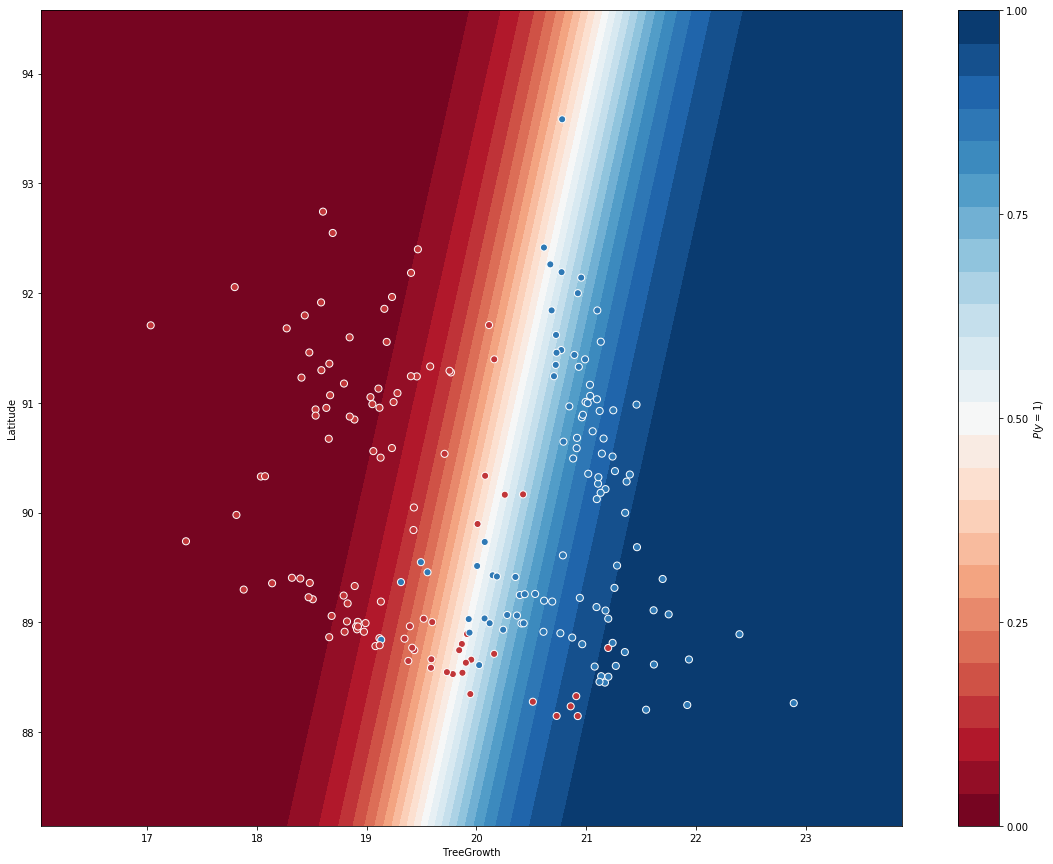

In [52]:
ModelPlotter(LR_Model, trees_df)